In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../raw_data/data_full_df_web_gd.csv", converters={'masc_words_list': eval, 'fem_words_list': eval, 'list_for_annotation': eval})

In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'job_id', 'url', 'loc', 'company_name',
       'job_title', 'job_description', 'company_url', 'masc_words',
       'fem_words', 'masc_coded', 'fem_coded', 'gender', 'indeed_review_score',
       'clean_description', 'company culture', 'inclusion', 'flexibility',
       'personal development', 'relevance score', 'company_web', 'results',
       'masc_words_list', 'fem_words_list', 'list_for_annotation'],
      dtype='object')

# Companies with most job ads

In [4]:
data.groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,job_title,job_description,company_url,masc_words,fem_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
company_name,,,,,,,,,,,,,,,,,,,,,
TikTok,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Amazon.com Services LLC,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
Facebook,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Uber,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Klein Independent School District,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26


# Gender decoded distribution of job ads

<AxesSubplot:>

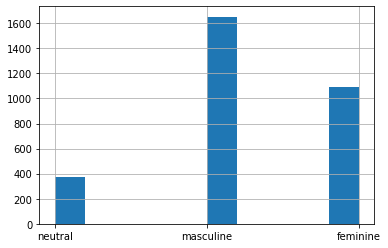

In [5]:
data['gender'].hist()

# Distribution of female-biased job ads

<AxesSubplot:>

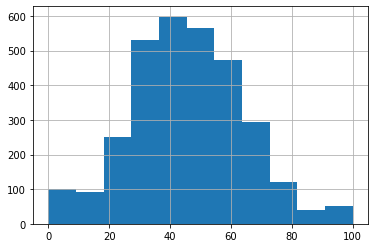

In [6]:
data['fem_coded'].hist(bins=11)

## Distribution of feminine words

<AxesSubplot:>

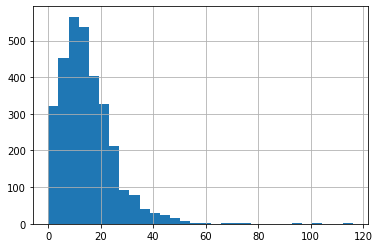

In [7]:
data['fem_words'].hist(bins=30)

# Distribution of male-biased job ads

<AxesSubplot:>

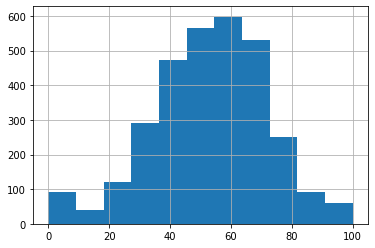

In [8]:
data['masc_coded'].hist(bins=11)

## Distribution of masculine words

<AxesSubplot:>

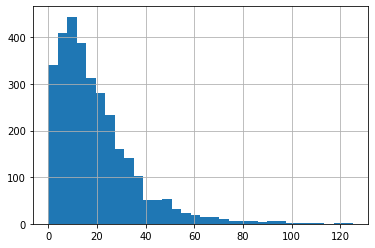

In [9]:
data['masc_words'].hist(bins=32)

# Top 5 companies with most feminine-coded job ads

In [10]:
data[data['gender'] == 'feminine'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,job_title,job_description,company_url,masc_words,fem_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
company_name,,,,,,,,,,,,,,,,,,,,,
TikTok,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Texas Children's Hospital,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
HEB,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
Uber,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Netflix,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


# Top 5 companies with most masculine-coded job ads

In [11]:
data[data['gender'] == 'masculine'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,job_title,job_description,company_url,masc_words,fem_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
company_name,,,,,,,,,,,,,,,,,,,,,
Amazon.com Services LLC,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
TikTok,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
"Amazon Web Services, Inc.",16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Google,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
REI,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


# Top 5 companies with most neutral-coded job ads

In [12]:
data[data['gender'] == 'neutral'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,job_title,job_description,company_url,masc_words,fem_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
company_name,,,,,,,,,,,,,,,,,,,,,
Klein Independent School District,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
TikTok,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Amazon.com Services LLC,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Facebook,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
California State University,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [13]:
data[data['company_name'] == 'TikTok'].groupby('gender').count()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
gender,,,,,,,,,,,,,,,,,,,,,
feminine,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
masculine,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
neutral,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


# Top 5 strongly feminine-coded job ads

In [14]:
df = data.copy()
df = df.iloc[:, : 14]
# df[df['gender'] == 'feminine'].sort_values(['fem_coded', 'fem_words'], ascending=False).head()
df[df['fem_words'] - df['masc_words'] > 20].sort_values(['fem_words', 'fem_coded'], ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender
1528,1528,1528,job_42e841fc584044c4,https://www.indeed.com/rc/clk?jk=42e841fc58404...,"Crosby, TX 77532",Dept of Family & Protectve Svc,newCPS Investigation Worker Trainee,A Child Protective Services Caseworker - SAO C...,https://www.indeed.com/cmp/Dept of Family & Pr...,67,103,39.0,61.0,feminine
1789,1789,1789,job_0f421e698a46e1f3,https://www.indeed.com/rc/clk?jk=0f421e698a46e...,"Houston, TX 77060 (Greater Greenspoint area)",Dept of Family & Protectve Svc,CPS INV Trainee Spec I,CPS INV Trainee Spec I\n\n\nA Child Protective...,https://www.indeed.com/cmp/Dept of Family & Pr...,67,103,39.0,61.0,feminine
2402,2402,2402,job_ada46566343f4fe6,https://www.indeed.com/rc/clk?jk=ada46566343f4...,"San Francisco, CA 94102 (Downtown area)",Mental Health Association of San Francisco,covid-19 emotional support line counselor (wee...,COVID-19 Emotional Support Line Counselor\nTIT...,https://www.indeed.com/cmp/Mental Health Assoc...,22,76,22.0,78.0,feminine
548,548,548,job_469e1638e4b5f589,https://www.indeed.com/company/Child-Care-Alli...,"Los Angeles, CA 90041 (Eagle Rock area)•Tempor...",Child Care Alliance of Los Angeles,newContracts Coordinator,Summary: The Contracts Coordinator is responsi...,https://www.indeed.com/cmp/Child Care Alliance...,20,59,25.0,75.0,feminine
2644,2644,2644,job_cf49bffff21a699a,https://www.indeed.com/rc/clk?jk=cf49bffff21a6...,"San Francisco, CA",Hillel International,Assistant Director,Assistant Director\nSan Francisco Hillel\nRole...,https://www.indeed.com/cmp/Hillel International,28,53,35.0,65.0,feminine


In [15]:
data[data['company_name'] == 'PM Pediatrics']

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
1302,1302,1302,job_81c903695e392a05,https://www.indeed.com/rc/clk?jk=81c903695e392...,"Lake Success, NY•Remote",PM Pediatrics,Corporate Patient Access Registrar - Remote,It's fun to work in a company where people tru...,https://www.indeed.com/cmp/PM Pediatrics,0,...,20,20,0,20,15.0,https://pmpediatrics.com/,"(['fun', 'work', 'company', 'people', 'truly',...",[],"[committed, passion, duties, knowledge, types,...","[It's , fun , to , work , in , a , company , w..."


In [16]:
data[data['company_name'] == 'San Antonio Regional Hospital']

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
451,451,451,job_7da4f156dd3bf8ad,https://www.indeed.com/rc/clk?jk=7da4f156dd3bf...,"Upland, CA 91786",San Antonio Regional Hospital,newPatient Access Representative,Overview:\n\nJOB SUMMARY\nThe Patient Access R...,https://www.indeed.com/cmp/San Antonio Regiona...,1,...,0,0,0,0,0.0,https://www.sarh.org/,"(['overview', 'job', 'summary', 'patient', 'ac...",[must],"[knowledge, key]","[Overview: , JOB , SUMMARY , The , Patient , A..."
598,598,598,job_af487169a6d872a4,https://www.indeed.com/rc/clk?jk=af487169a6d87...,"Upland, CA 91786",San Antonio Regional Hospital,newHousekeeping Aide,Overview:\n\nJOB SUMMARY\nThis Housekeeping Ai...,https://www.indeed.com/cmp/San Antonio Regiona...,0,...,0,0,0,20,5.0,https://www.sarh.org/,"(['overview', 'job', 'summary', 'housekeeping'...",[],"[responsible, understand, knowledge, learn, im...","[Overview: , JOB , SUMMARY , This , Housekeepi..."


In [17]:
data[data['company_name'] == "Trader Joe's"]

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
94,94,94,job_d3401b893a9dc0b7,https://www.indeed.com/rc/clk?jk=d3401b893a9dc...,"Rancho Palos Verdes, CA 90275+86 locations",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,0,...,20,20,0,20,15.0,https://www.traderjoes.com/home,"(['crew', 'members', 'create', 'warm', 'friend...",[],"[warm, friendly, know, responsibilities, learn...","[Is , it , you? , Our , Crew , Members , creat..."
670,670,670,job_8c31e4e4dac7c49c,https://www.indeed.com/rc/clk?jk=8c31e4e4dac7c...,"San Jose, CA 95129 (West San Jose area)+87 loc...",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,0,...,20,20,0,20,15.0,https://www.traderjoes.com/home,"(['crew', 'members', 'create', 'warm', 'friend...",[],"[warm, friendly, know, responsibilities, learn...","[Is , it , you? , Our , Crew , Members , creat..."
678,678,678,job_d0c5fa64e9568e59,https://www.indeed.com/rc/clk?jk=d0c5fa64e9568...,"Thousand Oaks, CA 91360+87 locations",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,0,...,20,20,0,20,15.0,https://www.traderjoes.com/home,"(['crew', 'members', 'create', 'warm', 'friend...",[],"[warm, friendly, know, responsibilities, learn...","[Is , it , you? , Our , Crew , Members , creat..."


# Top 5 strongly masculine-coded job ads

In [18]:
df = data.copy()
df = df.iloc[:, : 14]
# df[df['gender'] == 'masculine'].sort_values(['masc_coded', 'masc_words'], ascending=False).head()
df[df['masc_words'] - df['fem_words'] > 20].sort_values(['masc_words', 'masc_coded'], ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender
933,933,933,job_c14d5948c90ac29c,https://www.indeed.com/rc/clk?jk=c14d5948c90ac...,"Washington, DC 20520 (Foggy Bottom area)•Remote",U.S. Department of State,newEpidemiologist,Overview\nAccepting applications\nOpen & closi...,https://www.indeed.com/cmp/U.S. Department of ...,125,46,73.0,27.0,masculine
894,894,894,job_ff0b90155b04b398,https://www.indeed.com/rc/clk?jk=ff0b90155b04b...,"Fort Meade, MD",National Security Agency,Data Scientist,The professionals at the National Security Age...,https://www.indeed.com/cmp/National Security A...,120,22,85.0,15.0,masculine
677,677,677,job_7d5544425e58431a,https://www.indeed.com/rc/clk?jk=7d5544425e584...,"San Francisco, CA",US Citizenship and Immigration Services,newASYLUM OFFICER,Duties\nSummary\nThis position is located in t...,https://www.indeed.com/cmp/US Citizenship and ...,109,71,61.0,39.0,masculine
549,549,549,job_9463c5902ccee315,https://www.indeed.com/rc/clk?jk=9463c5902ccee...,"Sacramento, CA",US Forest Service,newGrants Management Specialist,Duties\nSummary\nThis position is located on t...,https://www.indeed.com/cmp/US Forest Service,104,76,58.0,42.0,masculine
2812,2812,2812,job_1824bff43a276f50,https://www.indeed.com/rc/clk?jk=1824bff43a276...,"Seattle, WA 98195 (University District area)•R...",University of Washington,DATA SPECIALIST,"As a UW employee, you have a unique opportunit...",https://www.indeed.com/cmp/University of Washi...,103,34,75.0,25.0,masculine


In [19]:
data[data['company_name'] == "Scorpion Internet Marketing"]

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
798,798,798,job_cf897c6c4096f6f1,https://www.indeed.com/company/Scorpion-Intern...,Remote,Scorpion Internet Marketing,Data Analyst,"As a Data Analyst at Scorpion, you’ll work wit...",https://www.indeed.com/cmp/Scorpion Internet M...,21,...,20,0,0,40,15.0,https://www.scorpion.co/,"(['data', 'analyst', 'scorpion', 'work', 'grow...","[data, analyst, evaluate, successful, analytic...",[],"[As , a , (Data , male, #8ef), (Analyst , male..."


In [20]:
data[data['company_name'] == "Goodwill Industries of South Texas"]

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
1860,1860,1860,job_5b89f3855efae6c9,https://www.indeed.com/company/Goodwill-Indust...,"Laredo, TX 78041+4 locations",Goodwill Industries of South Texas,newDATA ENTRY OPERATOR II,IMPORTANT INFORMATION: PLEASE READ FIRST.This ...,https://www.indeed.com/cmp/Goodwill Industries...,12,...,0,0,0,0,0.0,https://www.goodwillsouthtexas.com/,"(['important', 'information', 'please', 'read'...","[intellectual, third, party, data, documents]",[],"[IMPORTANT , INFORMATION: , PLEASE , READ , FI..."


In [21]:
data[data['company_name'] == "Los Angeles Unified School District"]

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
102,102,102,job_f8c96ae171e7c0df,https://www.indeed.com/company/Los-Angeles-Uni...,"Los Angeles, CA 90017 (Westlake area)",Los Angeles Unified School District,newNew Job Opening* Maintenance Planner-Apply ...,"Job Description: *To be officially considered,...",https://www.indeed.com/cmp/Los Angeles Unified...,8,...,0,0,0,20,5.0,https://achieve.lausd.net/,"(['job', 'description', 'officially', 'conside...","[must, assessments, force, productivity, data]",[],"[Job , Description: , *To , be , officially , ..."
503,503,503,job_3caf8493b61af2be,https://www.indeed.com/company/Los-Angeles-Uni...,"Los Angeles, CA 90017 (Westlake area)",Los Angeles Unified School District,Special Education Paraprofessional (Sub)* Urge...,LAUSD is looking Immediately to hire Substitut...,https://www.indeed.com/cmp/Los Angeles Unified...,3,...,0,0,0,20,5.0,https://achieve.lausd.net/,"(['lausd', 'looking', 'immediately', 'hire', '...",[must],"[knowledge, types]","[LAUSD , is , looking , Immediately , to , hir..."
567,567,567,job_2e217ef8e516793c,https://www.indeed.com/company/Los-Angeles-Uni...,"Los Angeles, CA 90017 (Westlake area)",Los Angeles Unified School District,newHuman Resources Representative* Hiring Now*...,"JOB DESCRIPTION*To be officially considered, a...",https://www.indeed.com/cmp/Los Angeles Unified...,6,...,0,40,20,40,25.0,https://achieve.lausd.net/,"(['job', 'description', 'officially', 'conside...","[must, matters, documents, principles, leave]","[agreements, representatives, action, relation...","[JOB , DESCRIPTION*To , be , officially , cons..."


# Top 5 neutral-coded job ads

In [22]:
data[data['gender'] == 'neutral'].sort_values(['masc_coded', 'masc_words'], ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
2571,2571,2571,job_1abb99d06fd81315,https://www.indeed.com/rc/clk?jk=1abb99d06fd81...,"Berkeley, CA 94720",University of California Berkeley,IT Director (0530U) - 20999,IT Director (0530U) - 20999 About Berkeley\n\n...,https://www.indeed.com/cmp/University of Calif...,54,...,100,40,20,40,50.0,https://www.berkeley.edu/,"(['director', 'berkeley', 'university', 'calif...","[freedom, leading, research, fueled, intellect...","[committed, fosters, feel, openness, commitmen...","[IT , Director , (0530U) , - , 20999 , About ,..."
2383,2383,2383,job_74b658189f5a4d45,https://www.indeed.com/rc/clk?jk=74b658189f5a4...,"San Mateo, CA 94402 (College Heights area)",San Mateo County Community College District,Part-time Personal Counselor Supporting Black ...,Part-time Personal Counselor Supporting Black ...,https://www.indeed.com/cmp/San Mateo County Co...,53,...,100,40,40,60,60.0,https://smccd.edu/,"(['personal', 'counselor', 'supporting', 'blac...","[based, engaging, leaders, innovative, data, c...","[supporting, varies, committed, collaboration,...","[Part-time , Personal , Counselor , (Supportin..."
2390,2390,2390,job_9c7eaa3efef2458b,https://www.indeed.com/rc/clk?jk=9c7eaa3efef24...,"San Francisco, CA•Remote",United for Respect,California State Organizer,ABOUT UNITED FOR RESPECT\n\nUnited for Respect...,https://www.indeed.com/cmp/United for Respect,50,...,80,80,0,80,60.0,https://united4respect.org/,"(['united', 'respect', 'united', 'respect', 'u...","[fighting, democracy, fight, win, leadership, ...","[respect, support, shared, key, responsible, e...","[ABOUT , UNITED , FOR , (RESPECT , female, #fa..."
1126,1126,1126,job_d978321799285f5e,https://www.indeed.com/company/For-Our-Future-...,"Washington, DC 20005 (Logan Circle area)•Remote",For Our Future Action Fund,National Regional Data Director,Job Advertisement: National Regional Data Dir...,https://www.indeed.com/cmp/For Our Future Acti...,40,...,40,40,0,20,25.0,https://forourfuturefund.org/,"(['job', 'advertisement', 'national', 'regiona...","[data, win, drive, active, analysis, analytics...","[action, fund, key, climate, support, shared, ...","[Job , Advertisement: , National , Regional , ..."
1467,1467,1467,job_1353f94ac9c450c0,https://www.indeed.com/rc/clk?jk=1353f94ac9c45...,"Missouri City, TX 77459",United States Postal Service,newPSE MAIL PROCESSING CLERK,United States Postal Service\nExternal Publica...,https://www.indeed.com/cmp/United States Posta...,35,...,20,20,40,20,25.0,https://www.usps.com/,"(['united', 'states', 'postal', 'service', 'ex...","[yet, examining, must, lead, leave, persons, i...","[missouri, varies, support, agreement, allegia...","[United , States , Postal , Service , External..."


# Check

In [23]:
data

,Unnamed: 0,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,...,company culture,inclusion,flexibility,personal development,relevance score,company_web,results,masc_words_list,fem_words_list,list_for_annotation
0,0,0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,11,...,20,20,20,20,20.0,https://www.cbp.gov/,"(['border', 'patrol', 'agents', 'prevent', 'te...","[women, protect, competitive, based, must, air...","[relies, response, willing, responding, duties...","[Border , Patrol , Agents , prevent , terroris..."
1,1,1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,16,...,60,60,20,40,45.0,https://www.gapinc.com/en-us/,"(['gap', 'brands', 'bridge', 'gaps', 'see', 'w...","[athleta, republic, individuality, decisions, ...","[sustainable, responsibly, communities, learn,...","[About , Gap , Inc. , Our , brands , bridge , ..."
2,2,2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,5,...,0,40,0,0,10.0,https://www.sandiegocounty.gov/,"(['county', 'san', 'diego', 'invites', 'resume...","[individuals, encouraged, must, second]","[duties, depending, committed]","[The , County , of , San , Diego , invites , r..."
3,3,3,job_38eab52a8b828c7f,https://www.indeed.com/rc/clk?jk=38eab52a8b828...,"Malibu, CA","City of Malibu, CA",Code Enforcement Officer,Application Deadline\nApplication Deadline Ext...,"https://www.indeed.com/cmp/City of Malibu, CA",0,...,0,0,0,0,0.0,https://www.malibucity.org/,"(['application', 'deadline', 'application', 'd...",[],[],"[Application , Deadline , Application , Deadli..."
4,4,4,job_6dc51c91cb582a3e,https://www.indeed.com/company/SafeStreetsUSA/...,"Sacramento, CA 95811 (Midtown - Winn Park Capi...",SafeStreetsUSA,newAPPRENTICE NEEDED ASAP,SafeStreets is the largest provider of ADT sec...,https://www.indeed.com/cmp/SafeStreetsUSA,0,...,0,20,0,20,10.0,https://www.safestreets.com/,"(['safestreets', 'largest', 'provider', 'adt',...",[],[willing],"[SafeStreets , is , the , largest , provider ,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3115,3115,job_8c96d5ddce253c87,https://www.indeed.com/rc/clk?jk=8c96d5ddce253...,"Seattle, WA",Redfin,Senior Software Developer - User Engagement,Redfin is revolutionizing the $75 billion real...,https://www.indeed.com/cmp/Redfin,8,...,80,20,20,60,45.0,https://www.redfin.com/,"(['redfin', 'revolutionizing', 'billion', 'rea...","[data, innovative, engaged, lead, driven, lead...","[innovative, highly, collaborative, shared, co...","[Redfin , is , revolutionizing , the , $75 , b..."
3116,3116,3116,job_34c5701ee3660418,https://www.indeed.com/rc/clk?jk=34c5701ee3660...,"Seattle, WA 98195 (University District area)",University of Washington,newSPECIAL EVENTS COORDINATOR,"Notes: As a UW employee, you will enjoy genero...",https://www.indeed.com/cmp/University of Washi...,46,...,80,60,20,80,60.0,https://www.washington.edu/,"(['notes', 'uw', 'employee', 'enjoy', 'generou...","[intellectual, artistic, research, analytics, ...","[excitement, caring, together, percent, suppor...","[Notes: , As , a , UW , employee, , you , will..."
3117,3117,3117,job_f2606dc37eed190e,https://www.indeed.com/rc/clk?jk=f2606dc37eed1...,"Seattle, WA",Comtech Telecommunications Corp.,Data Analyst,The Data Analyst’s responsibility is to collec...,https://www.indeed.com/cmp/Comtech Telecommuni...,26,...,60,20,0,20,25.0,https://www.comtechtel.com/,"

In [24]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'job_id', 'url', 'loc', 'company_name',
       'job_title', 'job_description', 'company_url', 'masc_words',
       'fem_words', 'masc_coded', 'fem_coded', 'gender', 'indeed_review_score',
       'clean_description', 'company culture', 'inclusion', 'flexibility',
       'personal development', 'relevance score', 'company_web', 'results',
       'masc_words_list', 'fem_words_list', 'list_for_annotation'],
      dtype='object')

In [25]:
for index in range(len(data)):
    if 'Philadelphia' in data['job_description'][index]:
        print(index)

520
939
976
1128
1759
1926
1993
2027
2056
2213
2390
2801
2834


In [26]:
for index in data[data['job_title'] == 'Data Analyst'].index:
    if 'Philadelphia' in data.iloc[index]['job_description']:
        print(index)

2056


In [27]:
index = 2056

In [28]:
text = data['job_description'][index]
text

"Company Description\nWho We Are\nA best-in-class city that attracts best-in-class talent, Philadelphia is an incredible place to build a career. From our thriving arts scene and rich history to our culture of passion and grit, there are countless reasons to love living and working here. With a workforce of over 30,000 people, and more than 1,000 different job categories, the City of Philadelphia offers boundless opportunities to make an impact.\nAs an employer, the City of Philadelphia values inclusion, integrity, innovation, empowerment, and hard work above all else. We offer a vibrant work environment, comprehensive health care and benefits, and the experience you need to grow and excel. If you’re interested in working with a passionate team of people who care about the future of Philadelphia, start here.\nWhat We Offer:\n Impact - The work you do here matters to millions.\n Growth - Philadelphia is growing, why not grow with it?\n Diversity & Inclusion - Find a career in a place wh

In [29]:
masc_words_list = data['masc_words_list'][index]
masc_words_list

['matters',
 'led',
 'major',
 'leadership',
 'data',
 'analyze',
 'competencies',
 'based',
 'analysis',
 'determined',
 'leave',
 'successful',
 'candidate',
 'must']

In [30]:
fem_words_list = data['fem_words_list'][index]
(fem_words_list)

['passion',
 'passionate',
 'responsive',
 'supports',
 'key',
 'communities',
 'support',
 'knowledge',
 'well',
 'depending',
 'coordination',
 'learn',
 'know',
 'spouses',
 'dependents',
 'partnership',
 'familial',
 'commission',
 'relations']

In [31]:
def list_for_annotation(text):
    List_for_annotation = []
    for word in text.split():

            flag_neut = False
            flag_fem = False
            flag_masc = False

            for fem_word in fem_words_list:
                if word.lower().find(fem_word) == 0:
                    for masc_word in masc_words_list:
                        if word.lower().find(masc_word) == 0:
                            List_for_annotation.append((word + ' ', "neutral", "#fea"))
                            flag_neut = True
                            print(word, fem_word, masc_word, 'NEUT')
                            break
                    else:
                        if flag_neut == False:
                            List_for_annotation.append((word + ' ', "female", "#faa"))
                            flag_fem = True
                            # print(word, fem_word, 'FEM')
                            break
            else:
                for masc_word in masc_words_list:
                    if word.lower().find(masc_word) == 0:
                        if flag_neut == False:
                            List_for_annotation.append((word + ' ', "male", "#8ef"))
                            flag_masc = True
                            # print(word, masc_word, 'MASC')
                            break

            if flag_neut == False and flag_fem == False and flag_masc == False:
                List_for_annotation.append(word + ' ')
                
    return List_for_annotation

In [32]:
List_for_annotation = list_for_annotation(text)
List_for_annotation

['Company ',
 'Description ',
 'Who ',
 'We ',
 'Are ',
 'A ',
 'best-in-class ',
 'city ',
 'that ',
 'attracts ',
 'best-in-class ',
 'talent, ',
 'Philadelphia ',
 'is ',
 'an ',
 'incredible ',
 'place ',
 'to ',
 'build ',
 'a ',
 'career. ',
 'From ',
 'our ',
 'thriving ',
 'arts ',
 'scene ',
 'and ',
 'rich ',
 'history ',
 'to ',
 'our ',
 'culture ',
 'of ',
 ('passion ', 'female', '#faa'),
 'and ',
 'grit, ',
 'there ',
 'are ',
 'countless ',
 'reasons ',
 'to ',
 'love ',
 'living ',
 'and ',
 'working ',
 'here. ',
 'With ',
 'a ',
 'workforce ',
 'of ',
 'over ',
 '30,000 ',
 'people, ',
 'and ',
 'more ',
 'than ',
 '1,000 ',
 'different ',
 'job ',
 'categories, ',
 'the ',
 'City ',
 'of ',
 'Philadelphia ',
 'offers ',
 'boundless ',
 'opportunities ',
 'to ',
 'make ',
 'an ',
 'impact. ',
 'As ',
 'an ',
 'employer, ',
 'the ',
 'City ',
 'of ',
 'Philadelphia ',
 'values ',
 'inclusion, ',
 'integrity, ',
 'innovation, ',
 'empowerment, ',
 'and ',
 'hard ',
 'wo

In [33]:
data['list_for_annotation'][index]

['Company ',
 'Description ',
 'Who ',
 'We ',
 'Are ',
 'A ',
 'best-in-class ',
 'city ',
 'that ',
 'attracts ',
 'best-in-class ',
 'talent, ',
 'Philadelphia ',
 'is ',
 'an ',
 'incredible ',
 'place ',
 'to ',
 'build ',
 'a ',
 'career. ',
 'From ',
 'our ',
 'thriving ',
 'arts ',
 'scene ',
 'and ',
 'rich ',
 'history ',
 'to ',
 'our ',
 'culture ',
 'of ',
 ('passion ', 'female', '#faa'),
 'and ',
 'grit, ',
 'there ',
 'are ',
 'countless ',
 'reasons ',
 'to ',
 'love ',
 'living ',
 'and ',
 'working ',
 'here. ',
 'With ',
 'a ',
 'workforce ',
 'of ',
 'over ',
 '30,000 ',
 'people, ',
 'and ',
 'more ',
 'than ',
 '1,000 ',
 'different ',
 'job ',
 'categories, ',
 'the ',
 'City ',
 'of ',
 'Philadelphia ',
 'offers ',
 'boundless ',
 'opportunities ',
 'to ',
 'make ',
 'an ',
 'impact. ',
 'As ',
 'an ',
 'employer, ',
 'the ',
 'City ',
 'of ',
 'Philadelphia ',
 'values ',
 'inclusion, ',
 'integrity, ',
 'innovation, ',
 'empowerment, ',
 'and ',
 'hard ',
 'wo

In [34]:
import pickle
fh = open("../vocab_masc.pkl", 'rb')
final_masc_vocab = pickle.load(fh)
fh.close()
fh = open("../vocab_fem.pkl", 'rb')
final_fem_vocab = pickle.load(fh)
fh.close()

In [35]:
# from nltk.stem import PorterStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize

# ps = PorterStemmer()

# for fem_word in final_fem_vocab:
#     for masc_word in final_masc_vocab:
#         if ps.stem(fem_word.lower()) == ps.stem(masc_word.lower()):
#             print(fem_word, masc_word)

In [36]:
def word_list(cleaned_description):
    masc_words_list = []
    fem_words_list = []
    neut_words_list = []

    n_masc_words = 0
    n_fem_words = 0

    for word in cleaned_description:
        if word in final_masc_vocab:
            masc_words_list.append(word)
            n_masc_words += 1
        if word in final_fem_vocab:
            fem_words_list.append(word)
            n_fem_words += 1
        
    return masc_words_list, fem_words_list

In [37]:
masc_list, fem_list = word_list(eval(data['clean_description'][index]))

In [38]:
list(dict.fromkeys(masc_list))

['matters',
 'led',
 'major',
 'leadership',
 'data',
 'analyze',
 'competencies',
 'based',
 'analysis',
 'determined',
 'leave',
 'successful',
 'candidate',
 'must']

In [39]:
list(dict.fromkeys(fem_list))

['passion',
 'passionate',
 'responsive',
 'supports',
 'key',
 'communities',
 'support',
 'knowledge',
 'well',
 'depending',
 'coordination',
 'learn',
 'know',
 'spouses',
 'dependents',
 'partnership',
 'familial',
 'commission',
 'relations']

In [40]:
fem_words_list == list(dict.fromkeys(fem_list))

True

In [41]:
masc_words_list == list(dict.fromkeys(masc_list))

True